In [34]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#readig dataset
data=pd.read_csv(r"C:\Users\ARPITA SINGH\Desktop\Salary_Data.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
data.isnull().sum() #cheching the data is null or not

YearsExperience    0
Salary             0
dtype: int64

In [11]:
data.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
data.describe() #statistical info about data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0, 0.5, 'Salary')

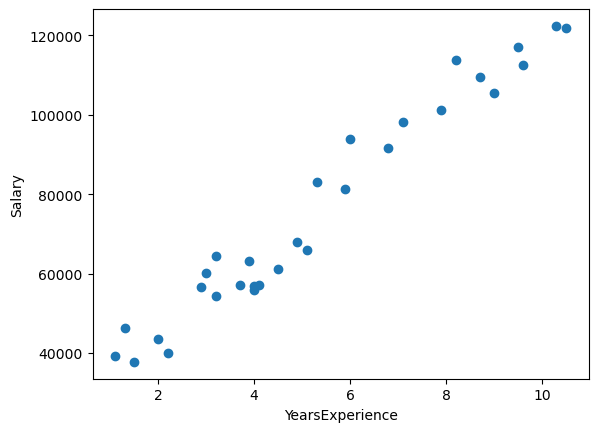

In [13]:
#scatter plot
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [14]:
#correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


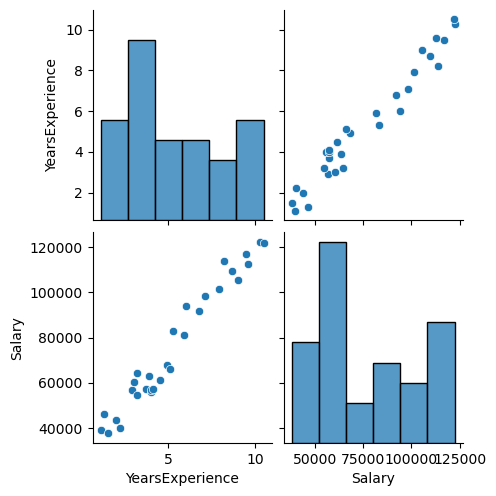

In [15]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(data)

In [20]:
type(X)

numpy.ndarray

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [22]:
## Independent and dependent features
#X=data[['YearsExperience']] ### independent features should be data frame or 2 dimesnionalarray
#y=data['Salary'] ## this variiable can be in series or 1d array

In [23]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [24]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

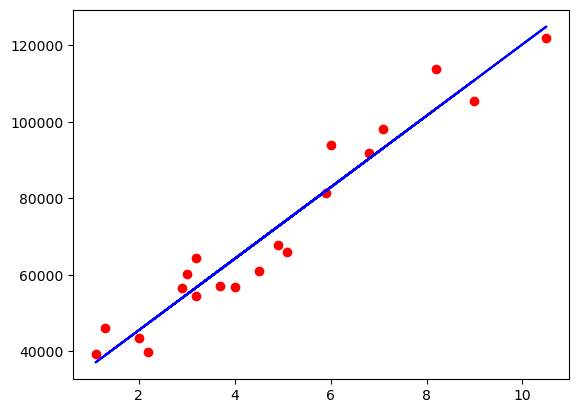

In [25]:
# Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# prediction of test data


In [27]:
## Prediction for test data
y_pred=regressor.predict(X_test)

In [28]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [29]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
#checking with cost function
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

21026037.329511303
3426.42693743071
4585.415720467589


# R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [31]:
#importing r2 
from sklearn.metrics import r2_score

In [32]:
score=r2_score(Y_test,y_pred)
print(score)

0.9749154407708353


# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables# 

In [33]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.9717798708671896